## 

In [2]:
#Script to copy pupil exported csv data to pupil_data folder

import os
import shutil

# Source and destination paths
rec_folder = '/Users/Quentin/recordings/2023_11_10/'
destination_root = 'pupil_data'
# Get a list of all folders in the source directory
folders_to_copy = [folder for folder in os.listdir(rec_folder) if os.path.isdir(os.path.join(rec_folder, folder)) and int(folder)>18]
print(folders_to_copy)
# # Copy each folder to the destination directory with a new name to avoid conflicts
for folder in folders_to_copy:
    source_folder_path = os.path.join(rec_folder, folder)
    source_folder_path += '/exports/000'
    
    # Generate a new folder name (you can modify this logic if needed)

    
    destination_folder_path = os.path.join(destination_root, folder)
    
    # Copy the entire folder to the new destination
    shutil.copytree(source_folder_path, destination_folder_path)

print("Folders copied successfully.")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/Quentin/recordings/2023_11_10/'

In [70]:
#Open PsychoPy metadata csv

import pandas as pd

def openPsychoPyExperimentMetadata(path):
    data = pd.read_csv(path)
    data = data[['videos','participant','session']]
    return data

def buildOneHotEncoding(row):
    filepath = row['videos']
    filepath = filepath.split('/')[1:-1]
    filepath[0] = filepath[0].split('_')[1:]
    init = int(filepath[0][0][-1])
    perturbation = 1 if filepath[0][-1] == "perturbation" else 0
    delta = 0 if filepath[-1] == "original" else int(filepath[-1][-1])
    return [init , perturbation , delta]

data = openPsychoPyExperimentMetadata('data/262320_PFE_2023-11-21_16h25.39.111.csv')

data['init'] = ""
data['perturbation'] = ""
data["delta"] = ""



OHE = data.apply(buildOneHotEncoding, axis = 1)
print(init)
data['init','perturbation','delta'] = 

data.head()


0     [1, 1, 2]
1     [3, 1, 2]
2     [4, 1, 0]
3     [3, 1, 0]
4     [4, 0, 2]
5     [1, 1, 0]
6     [2, 1, 2]
7     [4, 1, 1]
8     [2, 0, 2]
9     [4, 0, 0]
10    [1, 0, 0]
11    [1, 0, 2]
12    [3, 1, 1]
13    [3, 0, 2]
14    [3, 0, 1]
15    [1, 1, 1]
16    [3, 0, 0]
17    [4, 0, 1]
18    [2, 0, 0]
19    [4, 1, 2]
20    [1, 0, 1]
21    [2, 0, 1]
22    [2, 1, 0]
23    [2, 1, 1]
dtype: object


,videos,participant,session,init,perturbation,delta,"(init, perturbation, delta)"
0,video/Sphere_init1_speed1_perturbation/delta2/...,262320,1,,,,"[1, 1, 2]"
1,video/Sphere_init3_speed1_perturbation/delta2/...,262320,1,,,,"[3, 1, 2]"
2,video/Sphere_init4_speed1_perturbation/origina...,262320,1,,,,"[4, 1, 0]"
3,video/Sphere_init3_speed1_perturbation/origina...,262320,1,,,,"[3, 1, 0]"
4,video/Sphere_init4_speed1/delta2/0001-0150.avi,262320,1,,,,"[4, 0, 2]"


Pupil core data

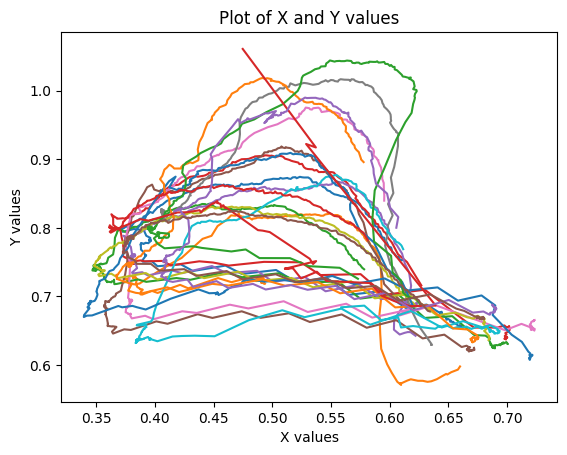

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data_folder = 'pupil_data'
folders_to_go = [folder for folder in os.listdir(data_folder)]
for folder in folders_to_go:
    csv_path = 'pupil_data/' + folder + '/gaze_positions.csv'
    df = pd.read_csv(csv_path,sep=(','))

    x = df.norm_pos_x
    y = df.norm_pos_y
        
    plt.plot(x,y)

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Plot of X and Y values')
plt.show()